# TimeDiff_ExtTRG_V1


## Program to analyze the time difference between different channels

This is a version of TimeDiff_ExtTRG_V2.sce developed in SciLab 

In [1]:
# Imports
import pandas as pd            # for shift array and other stuff
import numpy as np             # for linear algebra and other stuff
import math                    # for sqrt
from tqdm.notebook import tqdm # for progress bar
import glob                    # for read files

In [2]:
# File choice

dataDir = "../../dados/aquisicoes/Testes_10Fev2021/colimador_1mm/central (16h)/"

In [3]:
# Prefix of the filenames

prefixCharge = "Charge_"
prefixTime   = "Timetag_"

In [4]:
# Inputs (must be numbers)

nBoards   = int(input("Number of boards: "))
nChannels = int(input("Number of channels: ")) # per board

Number of boards: 2
Number of channels: 8


In [5]:
# Read data files to get the size (number of lines)

nLines = 0
for nB in range(nBoards):
    print(" Board: {b}".format(b = nB))
    for nC in range(nChannels):               
        timeFileName = dataDir + prefixTime + str(nB) + "_" + str(nC) + ".txt"
        num_lines = sum(1 for line in open(timeFileName))
        print(" Channel: {c} - Nb of lines: {d}".format(c = nC, d = num_lines)) 
        
        # prevents different number of lines (events) between channels an chooses the channel with the lowest 
        if ((nB == 0) and (nC == 0)):
            nLines = num_lines
        elif num_lines < nLines:
                nLines = num_lines
## Number of data cut to the minimum value between all files
print("Number of lines to use: {nl}".format(nl = nLines))

 Board: 0
 Channel: 0 - Nb of lines: 50432
 Channel: 1 - Nb of lines: 50432
 Channel: 2 - Nb of lines: 50432
 Channel: 3 - Nb of lines: 50432
 Channel: 4 - Nb of lines: 50432
 Channel: 5 - Nb of lines: 50432
 Channel: 6 - Nb of lines: 50432
 Channel: 7 - Nb of lines: 50432
 Board: 1
 Channel: 0 - Nb of lines: 50432
 Channel: 1 - Nb of lines: 50432
 Channel: 2 - Nb of lines: 50432
 Channel: 3 - Nb of lines: 50432
 Channel: 4 - Nb of lines: 50432
 Channel: 5 - Nb of lines: 50432
 Channel: 6 - Nb of lines: 50432
 Channel: 7 - Nb of lines: 50432
Number of lines to use: 50432


In [6]:
## Read data and put the Time Tag in matrices
## Using the extended Time (second column) 
vecTime = np.zeros((nBoards, nChannels, nLines), dtype=np.double)
overflTime = 2**32-1;  #4294967295
for nB in tqdm(range(nBoards)):
    for nC in tqdm(range(nChannels)):               
        timeFileName = dataDir + prefixTime + str(nB) + "_" + str(nC) + ".txt"
        a, b = np.genfromtxt(timeFileName, unpack=True)
        for line in range(nLines):
            vecTime[nB, nC, line] = a[line] + b[line] * overflTime

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [7]:
## Read data and put the charge in matrices
vecCharge= np.zeros((nBoards, nChannels, nLines), dtype=np.double)
for nB in tqdm(range(nBoards)):
    for nC in tqdm(range(nChannels)):               
        chargeFileName = dataDir + prefixCharge + str(nB) + "_" + str(nC) + ".txt"
        a = np.genfromtxt(chargeFileName, unpack=True)
        for line in range(nLines):
            vecCharge[nB, nC, line] = a[line]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
# Old version:
# ## Using the differences between Time Tags of channel 1, we find the first aligned line of each board
# ## Two values of the time difference between three subsequent lines will be used as condition to
# ## assign the lines as aligned in time

# print("Alignment of the first lines of the boards")
# maxTimeDiff   = math.sqrt(2) * 50 # maximum time difference tolerance for an events
# linesToSearch = 150 # we hope to find the first alignment in this interval
# refChan = 0 # reference channel    
# refLine = 0 # reference line
# matchLine = 0 # match line

# print('Searching in board 1...')
# for nL in range(linesToSearch):
#     timeDiff_B0 = vecTime[0, refChan, refLine + 1] - vecTime[0, refChan, refLine]    
#     timeDiff_B1 = vecTime[1, refChan, nL + 1] - vecTime[1, refChan, nL]
#     if (abs(timeDiff_B1 - timeDiff_B0) < maxTimeDiff):
#         matchLine = nL
#         print("Found in Board 1 - Line ", matchLine)        
#         break
#     else:
#         nL = nL + 1

# if (matchLine == 0):
#     print('Searching in board 0...')    
#     for nL in range(linesToSearch):        
#         timeDiff_B0 = vecTime[0, refChan, nL + 1] - vecTime[0, refChan, nL]        
#         timeDiff_B1 = vecTime[1, refChan, refLine + 1] - vecTime[1, refChan, refLine]
#         print('Line: ', nL)
#         print('a = {:.0f} - {:.0f} = {:.0f}'.format(vecTime[0, refChan, nL + 1], vecTime[0, refChan, nL], timeDiff_B0))
#         print('b = {:.0f} - {:.0f} = {:.0f}'.format(vecTime[1, refChan, refLine + 1], vecTime[1, refChan, refLine], timeDiff_B1))
#         print('b - a = |{:.0f}|'.format(abs(timeDiff_B1 - timeDiff_B0)))
#         print('---')
#         if (abs(timeDiff_B1 - timeDiff_B0) < maxTimeDiff):
#             matchLine = nL
#             print("Found in Board 0 - Line ", matchLine)        
#             break
#         else:
#             nL = nL + 1

# if (matchLine == 0):
#     print("Alignment not found")
# else:
#     print("Alignment found")

In [8]:
## Using the differences between Time Tags of channel 1, we find the first aligned line of each board
## Two values of the time difference between three subsequent lines will be used as condition to
## assign the lines as aligned in time

print("Alignment of events starting...")
maxTimeDiff   = math.sqrt(2) * 50 # maximum time difference for events in the same Trigger Time Tag
linesToSearch = 150               # maximum line to alignment match
refChan = 0 # reference channel    
refLine = 0 # reference line
matchLine = 0 # match line

# fill time differences in vectors [b x c x l]
td = np.zeros((nBoards, nChannels, linesToSearch), dtype=np.int) 
for nB in range(nBoards):
    for nC in range(nChannels):
        for nL in range(linesToSearch):
            td[nB, nC, nL] = vecTime[nB, nC, nL + 1] - vecTime[nB, nC, nL]


# take one time difference value and compares to all data
def searchAlignment(s):    
    for nB in range(nBoards):    
        for nC in range(nChannels):        
            for nL in range(linesToSearch):
                # return results in an array of True or False
                td_array = np.isclose(td[nB, nC, nL], td, atol = maxTimeDiff)                  
                result = np.where(td_array == True)   
                b = result[0] # Boards
                c = result[1] # Channels
                l = result[2] # Events

                # Is necessary an alignment match with all data 
                if (len(result[0]) == nBoards * nChannels):                                
                    for i in range(len(result[0])):
                        s[b[i], c[i]] = l[i]  
                    return

# shift lines for each board and channels:
shift = np.ones((nBoards, nChannels), dtype=np.int) 
shift = shift * (-1) 
searchAlignment(shift)

if(np.max(shift) > linesToSearch - 1):
    print('No alignment found. Maybe is necessary to modify linesToSearch or increase maxTimeDiff variable.')    
else:
    print('Alignment found in ', np.max(shift), ' line(s) at least.')


def shiftEvents(a, idB, idC, shiftleft):
    if (shiftleft > 0):
        a[idB, idC, :] = np.roll(a[idB, idC, :], shiftleft * (-1))
        a[idB, idC, shiftleft * (-1):] = 0
    return a

tmp_vecTime = np.copy(vecTime)
tmp_vecCharge = np.copy(vecCharge)


for nB in range(nBoards):
    for nC in range(nChannels):        
        shVecTime = shiftEvents(tmp_vecTime, nB, nC, shift[nB, nC])
        shVecCharge = shiftEvents(tmp_vecCharge, nB, nC, shift[nB, nC])

cutArray = np.max(shift) * (-1)

shVecTime = shVecTime[:, :, :cutArray]
shVecCharge = shVecCharge[:, :, :cutArray]

print('New arrays for time and energy have ', len(shVecTime[0,0]), ' events.')

nEvents = len(shVecTime[0,0])
print('Alignment finished.')

Alignment of events starting...
Alignment found in  1  line(s) at least.
New arrays for time and energy have  50431  events.
Alignment finished.


In [9]:
# Mount the matrix with the line correspondence for each board

matLineCorr = np.zeros((nBoards, nChannels, nEvents), dtype = np.int)
deltaLine = 3  # number of lines + 1 above and below to search

# For each channel there is a sistematic increase or decrease in the
# corresponding line number. The next variable will be used to improve
# the speed of search by starting the match try from the last matched line number.
lastLine = np.ones((nBoards, nChannels), dtype = np.int)

In [10]:
# Mount a new matrices with the aligned time tags and charge values
# overflow value 32767 will be set to 0
matTime = np.copy(shVecTime)
matCharge = np.copy(shVecCharge)

matCharge[matCharge > 32700] = 0

In [36]:
matCharge[1][7]

array([ 833., 1043.,  767., ..., 1270.,  812.,  494.])

In [11]:
# Sum the aligned charges to mount the energy spectrum of the sum
summedCharge = np.zeros((nBoards, nEvents), dtype=np.double)
for nB in range(nBoards):    
    for nL in range(nEvents):
        summedCharge[nB, nL] = np.sum(shVecCharge[nB, range(nChannels), nL])        

vectorSumHigh = np.zeros((nBoards, nEvents), np.double)
for nB in range(nBoards):    
    vectorSumHigh = vectorSumHigh + summedCharge[nB]

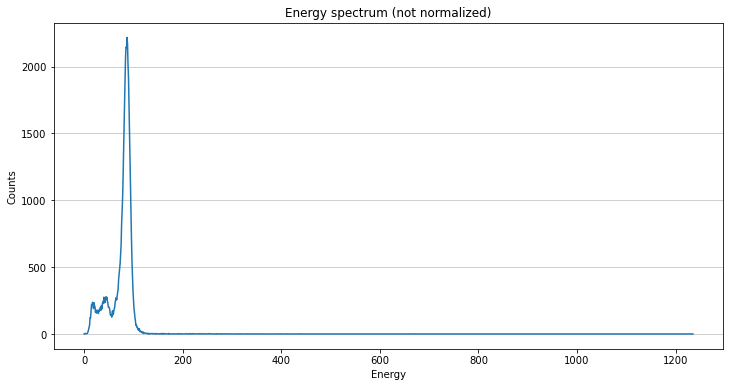

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
hist, bin_edges = np.histogram(vectorSumHigh[0], bins = 'auto')
plt.grid(axis = 'y', alpha=0.75)
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.title('Energy spectrum (not normalized)')
plt.plot(hist)

# nBins = 100
# maxValue = max(vectorSumHigh[0])
# minValue = min(vectorSumHigh[0])
# deltaValue = (maxValue - minValue) / nBins
# #xScale = minValue + range(deltaValue,deltaValue,maxValue)
# #spectrum = histc(nBins,vectorSumHigh,%f)

# n, bins, patches = plt.hist(x = vectorSumHigh[0], bins = 100, color='#0504aa',
#                             alpha=0.7, rwidth=0.85)
# plt.grid(axis = 'y', alpha=0.75)
# plt.xlabel('Energy')
# plt.ylabel('Counts')
# plt.title('Energy spectrum')
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

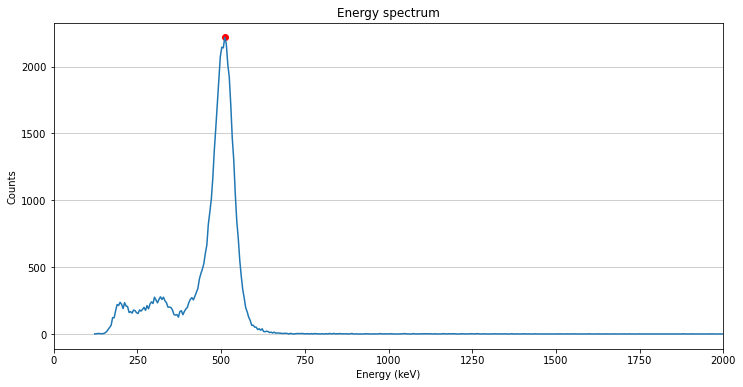

In [30]:
# 511 keV peak manual finder
from scipy.signal import find_peaks
hist, bin_edges = np.histogram(vectorSumHigh[0], bins = 'auto')
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
peaks, _ = find_peaks(hist, height = (2200,3000)) # Manual height range
print(peaks)
# Normalized 511 keV spectrum
pk_center = bin_centers[peaks]
divisor = pk_center / 511
norm511keV = np.true_divide(bin_centers, divisor)
plt.subplots(figsize=(12, 6))
plt.grid(axis = 'y', alpha=0.75)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Energy spectrum')
plt.plot(norm511keV[peaks], hist[peaks], 'ro')
plt.plot(norm511keV, hist)
plt.xlim([0, 2000]) # manual limits
plt.show()

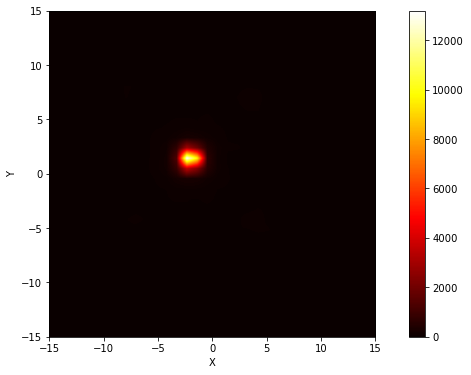

In [37]:
# Image using center of mass

mPixel = 4
imgChannels = mPixel * nChannels
vecPixels = np.linspace(((-1) * imgChannels / 2 + 1),(imgChannels / 2 - 1), imgChannels - 1)
Image = np.zeros((imgChannels, imgChannels), dtype = np.int)
meanColumn = 0
meanRow    = 0

for nL in range(nEvents):        
    sumCol = np.sum(matCharge[0, range(nChannels), nL])    
    if (sumCol > 0):
        sumRow = np.sum(matCharge[1, range(nChannels), nL])        
        if (sumRow > 0):
            meanColumn = int(np.round(mPixel * np.sum(matCharge[0, range(nChannels), nL] * range(nChannels)) / sumCol))            
            meanRow = int(np.round(mPixel * np.sum(matCharge[1, range(nChannels), nL] * range(nChannels)) / sumRow))            
    if ((meanColumn > 0 and meanColumn < imgChannels + 1) and (meanRow > 0 and meanRow < imgChannels + 1)):
        Image[meanRow, meanColumn] = Image[meanRow, meanColumn] + 1

plt.figure(figsize=(12, 6))
plt.imshow(Image, cmap= 'hot', interpolation = 'bilinear', extent=[min(vecPixels), max(vecPixels), min(vecPixels), max(vecPixels)]) 
plt.colorbar() 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


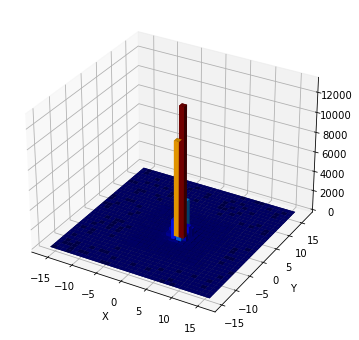

In [19]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(Image.shape[1]), np.arange(Image.shape[0]))
x = max(vecPixels) - x.flatten()
y = y.flatten() + min(vecPixels)
z = Image.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax.bar3d( x, y, np.zeros(len(z)),  1, 1, z, color=rgba)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

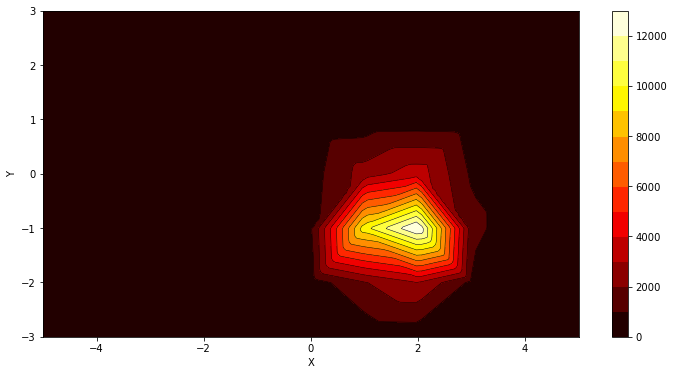

In [27]:
import matplotlib.tri as tri

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ngridx = 100
ngridy = 200

# Total view
# xi = np.linspace(min(vecPixels), max(vecPixels), ngridx)
# yi = np.linspace(min(vecPixels), max(vecPixels), ngridy)

# Inputs (must be numbers)
zoomx = int(input("Enter a shift number to zoom in x-axis (0 = default). The number must be between {} and {}: ".format(min(vecPixels), max(vecPixels))) or "0")
zoomy = int(input("Enter a shift number to zoom in y-axis (0 = default). The number must be between {} and {}: ".format(min(vecPixels), max(vecPixels))) or "0")

# Detail view
xi = np.linspace(min(vecPixels) + zoomx, max(vecPixels) - zoomx, ngridx)
yi = np.linspace(min(vecPixels) + zoomy, max(vecPixels) - zoomy, ngridy)

triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=14, cmap="hot")
fig.colorbar(cntr, ax=ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()